## 从雅虎财经网站获取股票数据

In [18]:
%matplotlib inline

import urllib
import os
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# 下载整个股票数据
def retrive_stock_data(stockid, folder):
    print('downloading %s to %s' % (stockid, folder))
    url = 'http://table.finance.yahoo.com/table.csv?s=%s' % (stockid)
    fname = os.path.join(folder, '%s.csv' % stockid.split('.')[0])
    if not os.path.isdir(folder):
        os.mkdir(folder)
    urllib.urlretrieve(url, fname)

In [3]:
retrive_stock_data('600690.ss', 'yahoo-data')

downloading 600690.ss to yahoo-data


In [4]:
# 更新股票数据，如果不存在，则下载。如果存在，则只更新最近日期的数据
def update_stock_data(stockid, folder):
    fname = os.path.join(folder, '%s.csv' % stockid.split('.')[0])
    if not os.path.exists(fname):
        retrive_stock_data(stockid, folder)
        return
    
    data = pd.read_csv(fname, index_col='Date', parse_dates=True)
    
    last_date = data.iloc[0:1].index.tolist()[0]
    today = pd.Timestamp(datetime.date.today())
    if today - last_date < pd.Timedelta(days=2):
        print('Nothing to update. %s last date is %s.' % (stockid, last_date))
        return
    
    print('updatting %s to from %s to %s' % (stockid, last_date.date(), today.date()))
    query = [
        ('a', last_date.month - 1),
        ('b', last_date.day),
        ('c', last_date.year),
        ('d', today.month - 1),
        ('e', today.day),
        ('f', today.year),
        ('s', stockid),
    ]
    url = 'http://table.finance.yahoo.com/table.csv?%s' % urllib.urlencode(query)
    temp_file = fname + '.tmp'
    urllib.urlretrieve(url, temp_file)
    update_data = pd.read_csv(temp_file, index_col='Date', parse_dates=True)
    data = data.append(update_data)
    data.sort_index(ascending=False, inplace=True)
    data.to_csv(fname, mode='w')
    os.unlink(temp_file)

In [5]:
update_stock_data('600690.ss', 'yahoo-data')

Nothing to update. 600690.ss last date is 2016-05-19 00:00:00.


### 获取所有的股票列表

In [6]:
sh = pd.read_csv('SH.txt', header=None, names=['name', 'id'], dtype={'id': np.string0}, skipinitialspace=True)
sh['id'] = sh['id'] + '.ss'
sh.head()

,name,id
0,浦发银行,600000.ss
1,邯郸钢铁,600001.ss
2,齐鲁石化,600002.ss
3,ST东北高,600003.ss
4,白云机场,600004.ss


In [7]:
sz = pd.read_csv('SZ.txt', header=None, names=['name', 'id'], dtype={'id': np.string0}, skipinitialspace=True)
sz['id']= sz['id'] + '.sz'
sz.head()

,name,id
0,平安银行,000001.sz
1,万科A,000002.sz
2,PT金田A,000003.sz
3,国农科技,000004.sz
4,世纪星源,000005.sz


In [8]:
slist = pd.concat([sh, sz])
slist.head()['id'].values

array(['600000.ss', '600001.ss', '600002.ss', '600003.ss', '600004.ss'], dtype=object)

In [9]:
slist[slist['id'].str.startswith('002')].head()

,name,id
509,新和成,002001.sz
510,鸿达兴业,002002.sz
511,伟星股份,002003.sz
512,华邦健康,002004.sz
513,德豪润达,002005.sz


## 数据分析

### 股票振幅

In [11]:
import stock_analysis as sa

amp = sa.amplitude(datadir='yahoo-data', interval=30, end_date="2015-12-22")

head 5 recent amplitude in period of 30 for all stocks in yahoo-data till 2015-12-22 00:00:00:
         id       amp
552  002558  3.096195
661  002667  3.049323
93   002094  2.267884
449  002453  2.200345
596  002602  2.135440
tail 5 recent ripples in period of 30 for all stocks in yahoo-data till 2015-12-22 00:00:00:
         id       amp
35   002036 -1.452381
288  002290 -1.453560
662  002668 -1.484576
619  002625 -1.530096
308  002310 -1.554295


In [12]:
amp[amp['amp'] < 1.3]

,id,amp
568,002574,1.299804
347,002351,1.299571
478,002482,1.299156
180,002181,1.298887
668,002674,1.298436
360,002364,1.298000
575,002581,1.295427
628,002634,1.295279
397,002401,1.295178
268,002270,1.293103


### 增长曲线

In [73]:
import yahoo_stock as ys

In [74]:
# 600690.ss 000951.sz 002001.sz
stockid = '002001.sz'
stockfile = '002001.csv'

In [72]:
ys.retrive_stock_data(stockid, 'yahoo-data')

downloading 002001.sz to yahoo-data from http://table.finance.yahoo.com/table.csv?s=002001.sz


In [75]:
ds = pd.read_csv(os.path.join('yahoo-data', stockfile), index_col='Date', parse_dates=True)
ds.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-05-19,19.12,19.52,18.90,18.98,12581300,18.98
2016-05-18,19.50,20.10,18.83,19.23,22042500,19.23
2016-05-17,19.73,20.23,19.65,19.77,20469800,19.77
2016-05-16,19.43,19.64,19.20,19.62,10963200,19.62
2016-05-13,19.70,19.94,19.27,19.40,15655100,19.40


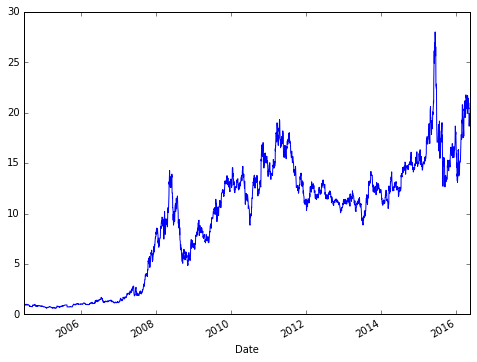

In [76]:
ds['Adj Close'].plot(figsize=(8, 6))

### 增长倍数

In [77]:
# 最高增长倍数
total_max_growth = ds['Adj Close'].max() / ds['Adj Close'].min()
total_max_growth

45.929402701285071

In [78]:
# 最大年均复合增长率
min_date = ds['Adj Close'].argmin()
max_date = ds['Adj Close'].argmax()
max_growth_per_year = total_max_growth ** (1.0 / (max_date.year - min_date.year))
max_growth_per_year

1.4662535606243374

In [79]:
# 当前平均增长倍数
total_growth = ds['Adj Close'].ix[0] / ds['Adj Close'].ix[-1]
total_growth

13.560436105911435

In [80]:
# 年复合增长倍数
old_date = ds['Adj Close'].index[-1]
now_date = ds['Adj Close'].index[0]
growth_per_year = total_growth ** (1.0 / (now_date.year - old_date.year))
growth_per_year

1.242670927502014